In [1]:
from tensorflow.keras.datasets import cifar10

# Loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape) + "\n")

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)) + "\n")

print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape) + "\n")

print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (50000, 32, 32, 3)

Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(32, 32, 3)
Labels in x_train:(50000, 1)

Dimensions of x_test:(32, 32, 3)
Labels in y_test:(10000, 1)


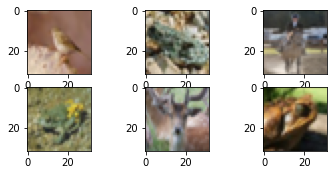

In [3]:
# importing matplotlib
# You may need to run this twice as matplotlib doesn't generate the plot in the same cell where it was imported
import matplotlib.pyplot as plt
import numpy as np

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

# Display out plots
plt.show()

In [4]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# store the shape of a single image for future use as a variable storing our input shape
input_shape = (img_rows, img_cols, 3)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
input_shape

(32, 32, 3)

In [6]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]

Number of Classes: 10


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
batch_size = 32
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9951 - accuracy: 0.2740 - val_loss: 1.7295 - val_accuracy: 0.3998
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6863 - accuracy: 0.3943 - val_loss: 1.5192 - val_accuracy: 0.4641
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5078 - accuracy: 0.4587 - val_loss: 1.3448 - val_accuracy: 0.5185
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4054 - accuracy: 0.4962 - val_loss: 1.2869 - val_accuracy: 0.5463
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3315 - accuracy: 0.5240 - val_loss: 1.2460 - val_accuracy: 0.5638
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2688 - accuracy: 0.5507 - val_loss: 1.1711 - val_accuracy: 0.5810
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2145 - accuracy: 0.5660 - val_loss: 1.1104 - val_accuracy:

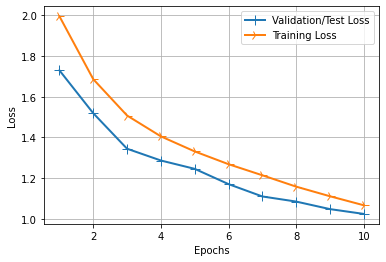

In [9]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

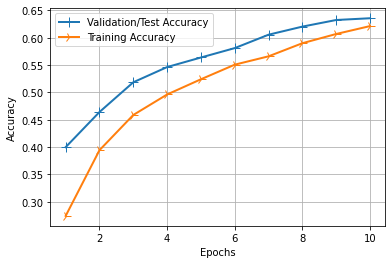

In [10]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

3	9	1	5	6	

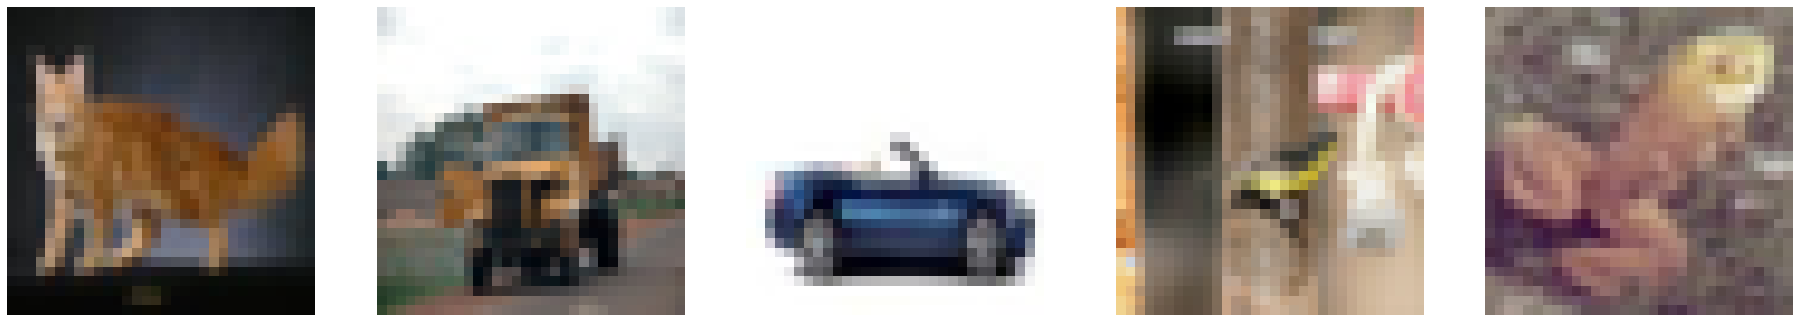

In [26]:
import numpy as np

figure = plt.figure(figsize=(32,32))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx])
    plt.axis("off")
    #print(model.predict(x_test[random_idx].reshape(1,32,32,3)))
    print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0),end="\t")

In [44]:


from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

In [50]:

from keras import models
from keras import layers# create the new model applying the base_model (VGG16)
model_1 = models.Sequential()
base_model.trainable = False
# using upsamplign to get more data points and improve the predictions
model_1.add(K.layers.UpSampling2D())
model_1.add(base_model)
model_1.add(K.layers.Flatten())
model_1.add(K.layers.Dense(512, activation=('relu')))
model_1.add(K.layers.Dropout(0.2))
model_1.add(K.layers.Dense(256, activation=('relu')))
model_1.add(K.layers.Dropout(0.2))
model_1.add(K.layers.Dense(10, activation=('softmax')))
model_1.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])



In [56]:
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

In [58]:
history1 = model_1.fit(x_train,
                    y_train,
                    batch_size = 34,
                    epochs = 5,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Epoch 1/5
1471/1471 [==============================] - 31s 21ms/step - loss: 1.1383 - accuracy: 0.6024 - val_loss: 1.1102 - val_accuracy: 0.6104
Epoch 2/5
1471/1471 [==============================] - 32s 21ms/step - loss: 1.1110 - accuracy: 0.6108 - val_loss: 1.1969 - val_accuracy: 0.5791
Epoch 3/5
1471/1471 [==============================] - 32s 22ms/step - loss: 1.0859 - accuracy: 0.6195 - val_loss: 1.0645 - val_accuracy: 0.6305
Epoch 4/5
1471/1471 [==============================] - 32s 22ms/step - loss: 1.0666 - accuracy: 0.6273 - val_loss: 1.0497 - val_accuracy: 0.6349
Epoch 5/5
1471/1471 [==============================] - 33s 22ms/step - loss: 1.0496 - accuracy: 0.6337 - val_loss: 1.0232 - val_accuracy: 0.6440
Test loss: 1.0231882333755493
Test accuracy: 0.6439999938011169
